In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from time_series.data_generators.lorenz_generator import generate_lorenz_curve
from time_series.time_series_models import KernelRidgeRegression, MovingAverageEstimator
from time_series.kernels import GaussianKernel

2025-09-12 12:39:19.864 | INFO     | time_series.config:<module>:13 - PROJ_ROOT path is: /home/james/Repo/PhD Repo/time_series_clustering


In [3]:
t, data = generate_lorenz_curve(
    noise_mean=[0,0,0], 
    noise_cov=0.0*np.eye(3), 
    x0=[10,10,10],
    dt=0.01, 
    T=2,
    rho=28, 
    sigma=10, 
    beta=8/3
)

print(len(t))

200


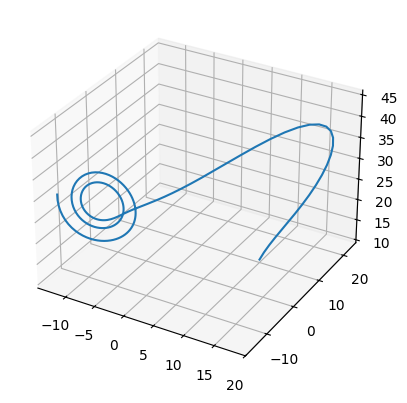

In [4]:
plt.figure().add_subplot(projection='3d')
plt.plot(*data.T);

In [5]:
from time_series.time_series_models import RascuttiModel

In [6]:
X = data[:-1]
y = data[1:, 0]

In [7]:
model = RascuttiModel(
    kernels=[
        GaussianKernel(bandwidth=80),
        GaussianKernel(bandwidth=80),
        GaussianKernel(bandwidth=80),
    ],
    lam=1e-6,
    rho=1e-6,
    lag=5,
    kernel_perterbation=1e-9
)

In [8]:
model.fit(X)

In [9]:
model.predict(X).shape

(196, 3)